In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer,StandardScaler,LabelBinarizer,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Libraries Permitted
    Scikit-learn
    XGBoost
    NumPy
    Pandas
    SciPy
    Pickle
    Seaborn
    Matplotlib

#### Type of Columns

    'v_1': 'Binary',
    'v_26': 'Binary',
    'v_11': 'Binary',
    'v_14': 'Binary',
    'v_30': 'Binary',
    'v_28': 'Binary', 
    'v_9': 'Binary', 
    'v_27': 'Binary',
    'v_32': 'Nominal', 
    'v_4': 'Nominal',
    'v_3': 'Nominal',
    'v_20': 'Nominal',
    'v_21': 'Nominal',
    'v_18': 'Nominal',
    'v_25': 'Nominal',
    'v_12': 'Nominal', 
    'v_31': 'Ordinal',
    'v_15': 'Ordinal',
    'v_19': 'Ordinal',
    'v_13': 'Ordinal',
    'v_33': 'Ordinal',
    'v_17': 'Ordinal',
    'v_29': 'Ordinal',
    'v_23': 'Ordinal',
    'v_6': 'Ordinal', 
    'v_24': 'Ordinal', 
    'v_10': 'Ordinal', 
    'v_5': 'Ordinal',
    'v_22': 'Ordinal',
    'v_0': 'Ordinal',
    'v_16': 'Ratio',
    'v_2': 'Ratio',
    'v_8': 'Ratio',
    'v_7': 'Ratio'


#### Discrete Columns
['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25', 'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9', 'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_23', 'v_24', 'v_10', 'v_5', 'v_6', 'v_0', 'v_34', 'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40', 'label']

In [2]:
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
}
sorted(dtype_info)

['v_0',
 'v_1',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'v_15',
 'v_16',
 'v_17',
 'v_18',
 'v_19',
 'v_2',
 'v_20',
 'v_21',
 'v_22',
 'v_23',
 'v_24',
 'v_25',
 'v_26',
 'v_27',
 'v_28',
 'v_29',
 'v_3',
 'v_30',
 'v_31',
 'v_32',
 'v_33',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9']

In [3]:
data = pd.read_pickle("../data/train.pkl")

In [51]:
# analysis = dtale.show(data, inlace=True, notebook=False)
# # plot = ordinal_data.hist(figsize=(20,15),layout=(5,4),legend=True,bins=10)
# analysis

In [40]:
discrete = data.select_dtypes(include="int64")
numeric = data.select_dtypes(include="float64")

ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]

In [5]:
def categorise_data(data):
    ordinal_data = data.loc[:,ordinal]
    nominal_data = data.loc[:,nominal]
    binary_data = data.loc[:,binary]
    return ordinal_data, nominal_data, binary_data
# ordinal_data.to_pickle('../data/ordinal_data.pkl')
# nominal_data.to_pickle('../data/nominal_data.pkl')
# binary_data.to_pickle('../data/binary_data.pkl')
ordinal_data = pd.read_pickle('../data/ordinal_data.pkl')
nominal_data = pd.read_pickle('../data/nominal_data.pkl')
binary_data = pd.read_pickle('../data/binary_data.pkl')

In [7]:
%matplotlib inline

#### Histograms of Ordinal Data
![Image](../imgs/hist_ordinal.png)

#### Histograms of Nominal Data
![Image](../imgs/hist_nominal.png)

#### Histograms of Binary Data
![Image](../imgs/hist_binary.png)

In [179]:
# data.to_pickle('../data/train.pkl')
# # data = pd.read_csv('../data/train.csv', index_col=0)

In [166]:
def separate_floating_value(ordinal_data):
    ordinal_data['decimal_values_29'] = 0
    ordinal_data['decimal_values_22'] = 0
    ordinal_data.decimal_values_22 = ordinal_data.v_22 - ordinal_data.v_22.round()
    ordinal_data.decimal_values_29 = ordinal_data.v_29 - ordinal_data.v_29.round()
    ordinal_data.v_29 = ordinal_data['v_29'].round()
    ordinal_data.v_22 = ordinal_data['v_22'].round()
    return ordinal_data

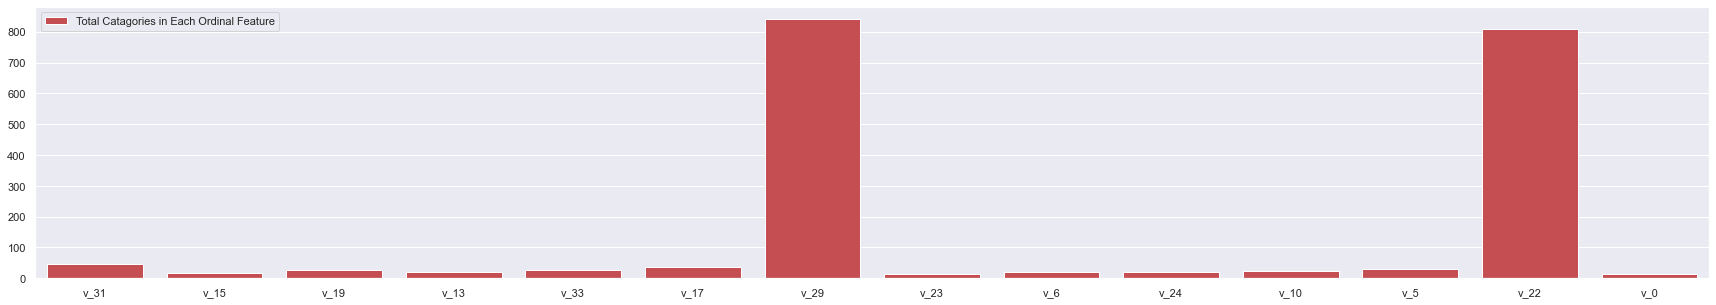

In [8]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
plt.legend()
# plt.table(ordinal)
plt.show()

##### After Removing the decimal Part from the features

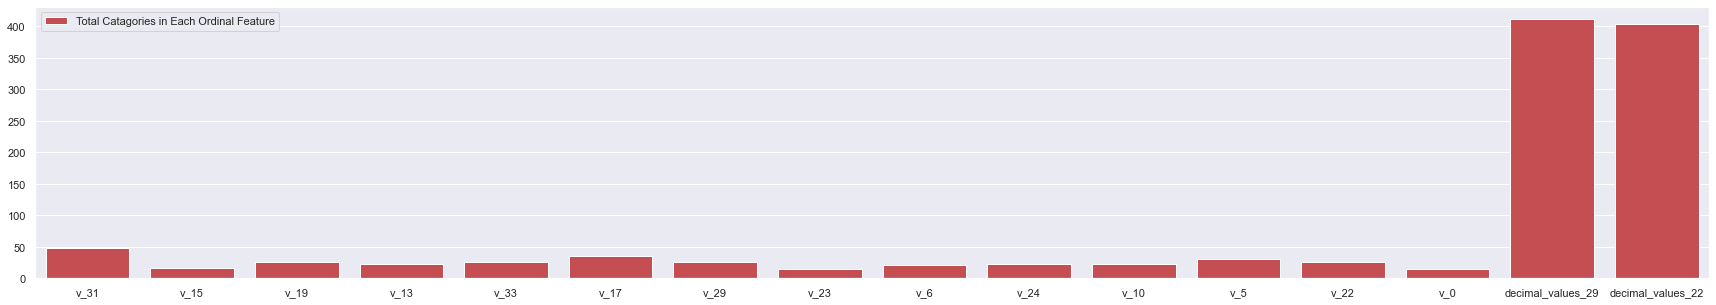

In [9]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal_data.columns:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(ordinal_data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal_data.columns,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
# plt.table(ordinal)
# fig = plt.title
plt.xlabel = "After CLeanup"
fig = plt.legend()
fig = plt.show()

In [10]:
# pd
temp = pd.DataFrame(oridinal_categories_total,columns=oridinal_categories_total.keys(),index=['count'])
temp.style

,v_31,v_15,v_19,v_13,v_33,v_17,v_29,v_23,v_6,v_24,v_10,v_5,v_22,v_0,decimal_values_29,decimal_values_22
count,48,17,26,22,26,36,26,14,21,22,23,30,26,15,411,403


In [10]:
for c in ordinal_data.columns:
    if 'decimal' not in c:
        ordinal_data[c] = ordinal_data[c].astype(np.uint8)

In [62]:
def print_num_cat(dd):
    for c in dd.columns:
        print(c,"\t|\t", len(dd[c].unique()))
        print("-"*30)

print("Binary")
print_num_cat(binary_data)
# print("-"*30)
print("\n"*4)

print("Nominal")
print_num_cat(nominal_data)

Binary
v_1 	|	 11
------------------------------
v_26 	|	 11
------------------------------
v_11 	|	 11
------------------------------
v_14 	|	 10
------------------------------
v_30 	|	 11
------------------------------
v_28 	|	 11
------------------------------
v_9 	|	 11
------------------------------
v_27 	|	 11
------------------------------





Nominal
v_32 	|	 84
------------------------------
v_4 	|	 98
------------------------------
v_3 	|	 113
------------------------------
v_20 	|	 94
------------------------------
v_21 	|	 22
------------------------------
v_18 	|	 85
------------------------------
v_25 	|	 76
------------------------------
v_12 	|	 37
------------------------------


In [136]:
ordinal_data.decimal_values_22[ordinal_data.decimal_values_22! = 0].shape

(2496,)

In [ ]:
fig = plt.figure(figsize=(30,10))

hm = sns.heatmap(data.corr())

In [63]:
corr_mat = data.corr()

In [ ]:
training_target = data.label
df = data.drop(['label'],axis=1)
# len(df.columns)
corr_mat

In [42]:
# others = [c for c in data.columns if '__' not in c]
def rename_with_type_label(data):
    global ordinal,nominal,binary
    rn_mp_ord = {c: f'ord__{c}' for c in ordinal}
    rn_mp_nom = {c: f'nom__{c}' for c in nominal}
    rn_mp_bin = {c: f'bin__{c}' for c in binary}
    # rn_mp_num = {c: f'bin__{c}' for c in binary}
    rn_mp_bin.update(rn_mp_nom)
    rn_mp_ord.update(rn_mp_bin)
    sorted(rn_mp_ord)

    data = data.rename(rn_mp_ord,axis=1)
    return data
data = rename_with_type_label(data)

In [71]:
others = [c for c in data.columns if '__' not in c]

other_data = data.loc[:,others]

data.columns
from collections import defaultdict


def gen_adj_list(threshold, data=data):
    adj_list = defaultdict(list)
    corr_mat = data.corr()
    for c in data.columns:
        # adj_list[c].append()
        e = list(corr_mat[corr_mat[c]>=threshold][c].index)
        e.remove(c)
        adj_list[c]=e
        # print(e)
        # break
    return adj_list

#### Correlation graph of features with correl > 0.5
<img src="../imgs/correl_0.5.png" alt="Drawing" style="width: 1900px;height: 500px;"/>

In [195]:
medi = medi.loc[:,['v_29','v_22','decimal_values_29','decimal_values_22']]

medi_29 = medi.sort_values(by='v_29', axis=0)

medi_29.sort_values(by='v_29',inplace=True)

tempdf = pd.DataFrame()

tempdf['v_29'] = medi_29.v_29 + medi_29.decimal_values_29

tempdf['v_22'] = medi_29.v_22 + medi_29.decimal_values_22

In [75]:
from numpy.random  import default_rng
rng = default_rng(1212)

In [80]:
d = rng.integers(3,size=20)

In [81]:
d.

array([0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2])

In [82]:
 
def isPrime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    for i in range(5, int(np.sqrt(n) + 1), 6):
        if n % i == 0 or n % (i + 2) == 0:
            return False
    return True


def nextPrime(N):
    if N <= 1:
        return 2
    prime = N
    found = False
    while not found:
        prime = prime + 1
        if isPrime(prime):
            found = True
    return prime


In [83]:
nextPrime(89)

97

In [96]:
from sklearn.metrics import pairwise_distances
from joblib import parallel_backend
with parallel_backend('threading'):
    r = pairwise_distances(data, metric='hamming',n_jobs=-1)
r

array([[0.        , 1.        , 0.47619048, ..., 0.95238095, 0.92857143,
        0.66666667],
       [1.        , 0.        , 1.        , ..., 0.97619048, 0.95238095,
        0.97619048],
       [0.47619048, 1.        , 0.        , ..., 0.92857143, 0.95238095,
        0.5952381 ],
       ...,
       [0.95238095, 0.97619048, 0.92857143, ..., 0.        , 0.95238095,
        0.9047619 ],
       [0.92857143, 0.95238095, 0.95238095, ..., 0.95238095, 0.        ,
        0.97619048],
       [0.66666667, 0.97619048, 0.5952381 , ..., 0.9047619 , 0.97619048,
        0.        ]])

In [107]:
def Hamming_distance(a, b):
    "Funtion to calculate hamming distance between array a and b"
    ham = 0
    for i in range(a.shape[0]):
        if a[i] != b[i]:
            ham += 1
    return ham

In [125]:
hd = np.empty(shape=(len(binary),len(binary)))
for i, c in enumerate(binary):
    x = binary_data.loc[:, c].to_numpy()
    for j, e in enumerate(binary):
        y = binary_data.loc[:, e].to_numpy()
        tps = x-y
        tps = np.abs(tps)
        # print(c,e, len(np.where(tps>0)[0]))
        hd[i][j] = len(np.where(tps > 0)[0])

In [126]:
hd

array([[   0., 3127., 1828., 3369., 2569., 3329., 2721., 1259.],
       [3127.,    0., 2391., 1023., 1796., 1026., 1656., 3365.],
       [1828., 2391.,    0., 2335., 2441., 2318., 2181., 1994.],
       [3369., 1023., 2335.,    0., 1770.,  760., 1414., 3312.],
       [2569., 1796., 2441., 1770.,    0., 1777., 2200., 2648.],
       [3329., 1026., 2318.,  760., 1777.,    0., 1452., 3331.],
       [2721., 1656., 2181., 1414., 2200., 1452.,    0., 2664.],
       [1259., 3365., 1994., 3312., 2648., 3331., 2664.,    0.]])

In [130]:
for c in binary_data.columns:
    print(binary_data[c].value_counts().sort_index())
    print("="*80)

0      336
1     2817
2       74
3       73
4       78
5       84
6       50
7       78
8       83
9       59
10      64
Name: v_1, dtype: int64
0     2801
1      397
2       72
3       80
4       75
5       72
6       65
7       89
8       71
9       68
10       6
Name: v_26, dtype: int64
0     1413
1     1770
2       67
3       65
4       73
5       65
6       64
7       75
8       73
9       86
10      45
Name: v_11, dtype: int64
0    3115
1     118
2      75
3      66
4      70
5      75
6      72
7      78
8      69
9      58
Name: v_14, dtype: int64
0     2036
1     1145
2       66
3       72
4       96
5       58
6       80
7       67
8       71
9       76
10      29
Name: v_30, dtype: int64
0     3089
1      154
2       68
3       70
4       72
5       63
6       70
7       67
8       72
9       70
10       1
Name: v_28, dtype: int64
0     2374
1      837
2       74
3       76
4       67
5       77
6       66
7       57
8       63
9       78
10      27
Name: v_9, dtype: int64
0